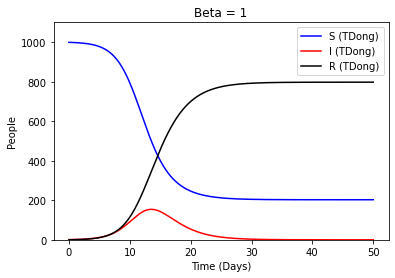

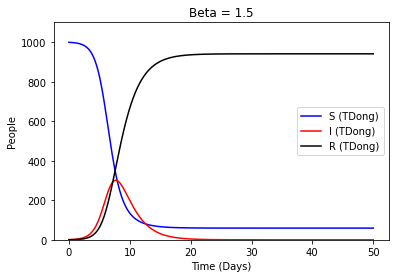

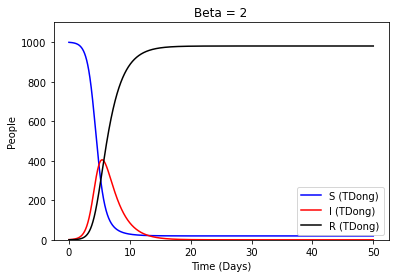

In [38]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
S_0 = 999
I_0 = 1
R_0 = 0
beta = [1,1.5,2]
gamma = 0.5
t0 = 0
t = 50 #days
dt = 0.01

def dSdt(t, S, I, R, beta):
    return -1*beta*S*I/N

def dIdt(t, S, I, R, beta):
    return beta*S*I/N-gamma*I

def dRdt(t, S, I, R, beta):
    return gamma*I

def FEM(t0, t, dt, S_0, I_0, R_0, beta):
    steps = int((t-t0)/dt)+1
    t_val = np.linspace(t0, t, steps)
    S_val = np.zeros(steps)
    I_val = np.zeros(steps)
    R_val = np.zeros(steps)
    S_val[0] = S_0
    I_val[0] = I_0
    R_val[0] = R_0

    for i in range(1, steps):
        t = t_val[i-1]
        S = S_val[i-1]
        I = I_val[i-1]
        R = R_val[i-1]
        S_val[i] = S + dSdt(t, S, I, R, beta)*dt
        I_val[i] = I + dIdt(t, S, I, R, beta)*dt
        R_val[i] = R + dRdt(t, S, I, R, beta)*dt

    return t_val, S_val, I_val, R_val

for beta in beta:
    t_sim, S_sim, I_sim, R_sim = FEM(t0, t, dt, S_0, I_0, R_0, beta)
    plt.plot(t_sim, S_sim, label='S (TDong)', color = 'blue')
    plt.plot(t_sim, I_sim, label='I (TDong)', color = 'red')
    plt.plot(t_sim, R_sim, label='R (TDong)', color = 'black')
    plt.xlabel('Time (Days)')
    plt.ylabel('People')
    plt.title('Beta = ' + str(beta))
    plt.ylim([0,1.1*N])
    plt.legend()
    plt.show()

a) The total epidemic size is the sum of those who have recovered and those who are currently infectious:
Cumulative Incidence = R + I   @ t = Infinity

Assuming I_inf = 0, then total epidemic size is just those who have recovered from the disease:
Cumulative Incidence = r_inf

Or if I_inf does not = 0, then total epidemic size is just those who are not susceptible to the disease (i.e. those who are still infected + those who have recovered):
Cumulative Incidence = 1 - s_inf


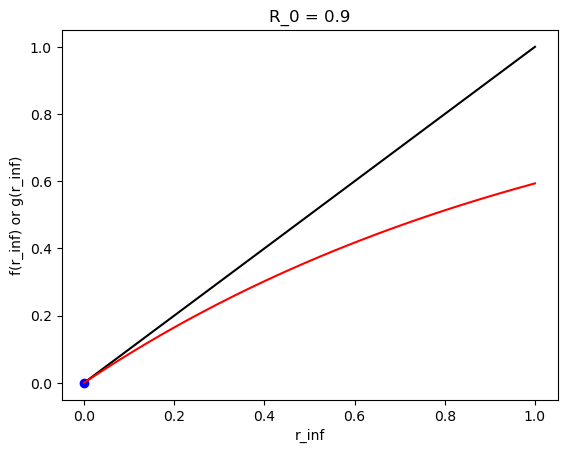

Intersection Point:
0.000


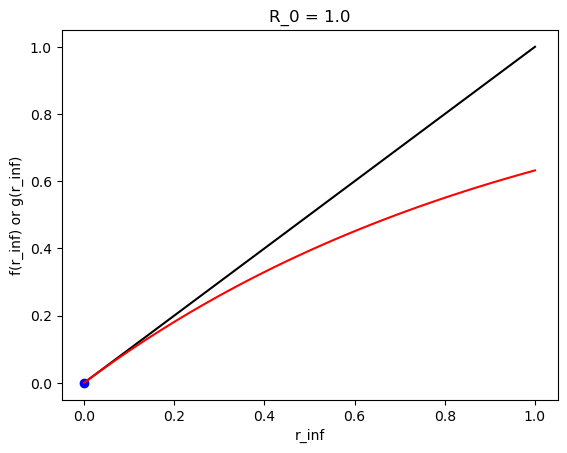

Intersection Point:
0.000


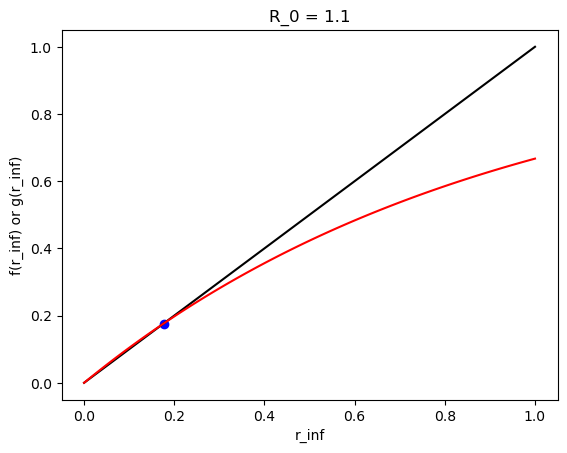

Intersection Point:
0.176


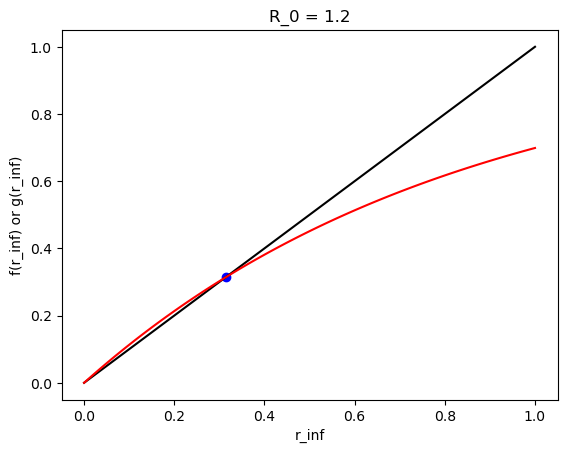

Intersection Point:
0.314

c) When R_0 is less than 1, there is no solution for r_inf outside of zero meaning that no one ultimately gets infected and need to recover (total epidemic size = 0).

This makes sense since R_0 correspond to expected number of secondary infections caused by one infected person.

So, if R_0 is small and thus does not cause widespread infections, we will see little to no spread of the disease right off the bat or that the epidemic will fade out extremely quickly

d) In this case R_0 = beta/gamma = 2, and we solve the intersection point for r_inf same as before:


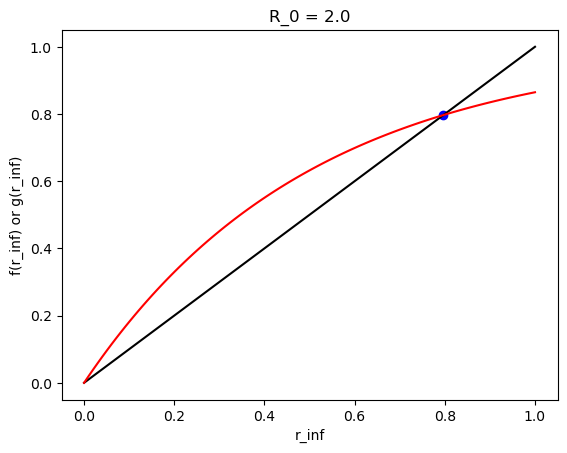

Intersection Point:
0.797

Then we plot a dotted horizontal line at y = r_inf*N to get the prediction for final epidemic size:


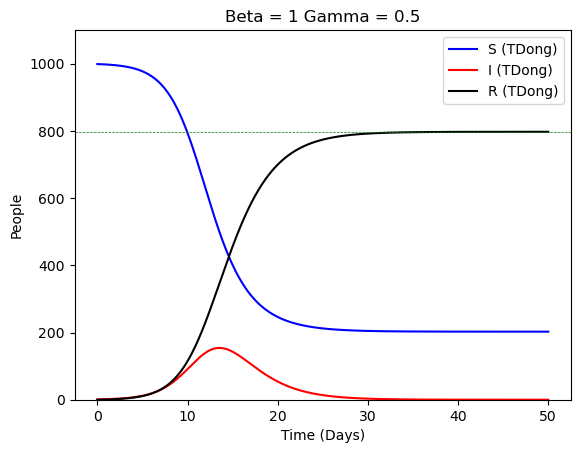


This method for final epidemic size prediction seems to work very well.


In [64]:
print("a) The total epidemic size is the sum of those who have recovered and those who are currently infectious:")
print("Cumulative Incidence = R + I   @ t = Infinity")
print("\nAssuming I_inf = 0, then total epidemic size is just those who have recovered from the disease:")
print("Cumulative Incidence = r_inf")
print("\nOr if I_inf does not = 0, then total epidemic size is just those who are not susceptible to the disease (i.e. those who are still infected + those who have recovered):")
print("Cumulative Incidence = 1 - s_inf")

from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

def f(r_inf):
    return r_inf

def g(r_inf, R_0):
    return 1-np.exp(-1*R_0*r_inf)
      
R_0 = [0.9,1.0,1.1,1.2]

for R_0 in R_0:
    r_inf_vals = np.linspace(0, 1, 100)
    plt.plot(r_inf_vals, f(r_inf_vals), label='f(r_inf)', color='black')
    plt.plot(r_inf_vals, g(r_inf_vals,R_0), label='g(r_inf)', color='red')
    init_guess = 1
    intersect= fsolve(lambda r_inf: f(r_inf) - g(r_inf,R_0), init_guess)
    plt.scatter(intersect, f(intersect), color='blue', marker='o', label='Intersection Point')
    plt.xlabel('r_inf')
    plt.ylabel('f(r_inf) or g(r_inf)')
    plt.title('R_0 = ' + str(R_0))
    plt.show()
    print("Intersection Point:")
    print("{:.3f}".format(float(intersect)))
    
print("\nc) When R_0 is less than 1, there is no solution for r_inf outside of zero meaning that no one ultimately gets infected and need to recover (total epidemic size = 0).")
print("\nThis makes sense since R_0 correspond to expected number of secondary infections caused by one infected person.")
print("\nSo, if R_0 is small and thus does not cause widespread infections, we will see little to no spread of the disease right off the bat or that the epidemic will fade out extremely quickly")



import numpy as np
import matplotlib.pyplot as plt


print("\nd) In this case R_0 = beta/gamma = 2, and we solve the intersection point for r_inf same as before:")

N = 1000
S_0 = 999
I_0 = 1
R_0 = 0
beta = 1
gamma = 0.5
t0 = 0
t = 50 #days
dt = 0.01

R0 = beta/gamma

r_inf_vals = np.linspace(0, 1, 100)
plt.plot(r_inf_vals, f(r_inf_vals), label='f(r_inf)', color='black')
plt.plot(r_inf_vals, g(r_inf_vals,R0), label='g(r_inf)', color='red')
init_guess = 1
intersect= fsolve(lambda r_inf: f(r_inf) - g(r_inf,R0), init_guess)
plt.scatter(intersect, f(intersect), color='blue', marker='o', label='Intersection Point')
plt.xlabel('r_inf')
plt.ylabel('f(r_inf) or g(r_inf)')
plt.title('R_0 = ' + str(R0))
plt.show()
print("Intersection Point:")
print("{:.3f}".format(float(intersect)))


def dSdt(t, S, I, R, beta):
    return -1*beta*S*I/N

def dIdt(t, S, I, R, beta):
    return beta*S*I/N-gamma*I

def dRdt(t, S, I, R, beta):
    return gamma*I

def FEM(t0, t, dt, S_0, I_0, R_0, beta):
    steps = int((t-t0)/dt)+1
    t_val = np.linspace(t0, t, steps)
    S_val = np.zeros(steps)
    I_val = np.zeros(steps)
    R_val = np.zeros(steps)
    S_val[0] = S_0
    I_val[0] = I_0
    R_val[0] = R_0

    for i in range(1, steps):
        t = t_val[i-1]
        S = S_val[i-1]
        I = I_val[i-1]
        R = R_val[i-1]
        S_val[i] = S + dSdt(t, S, I, R, beta)*dt
        I_val[i] = I + dIdt(t, S, I, R, beta)*dt
        R_val[i] = R + dRdt(t, S, I, R, beta)*dt

    return t_val, S_val, I_val, R_val


print("\nThen we plot a dotted horizontal line at y = r_inf*N to get the prediction for final epidemic size:")

t_sim, S_sim, I_sim, R_sim = FEM(t0, t, dt, S_0, I_0, R_0, beta)
plt.plot(t_sim, S_sim, label='S (TDong)', color = 'blue')
plt.plot(t_sim, I_sim, label='I (TDong)', color = 'red')
plt.plot(t_sim, R_sim, label='R (TDong)', color = 'black')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = ' + str(beta) + ' Gamma = ' + str(gamma))
plt.ylim([0,1.1*N])
plt.axhline(f(intersect)*N, color='green', linestyle = '--', linewidth=0.5)
plt.legend()
plt.show()

print("\nThis method for final epidemic size prediction seems to work very well.")

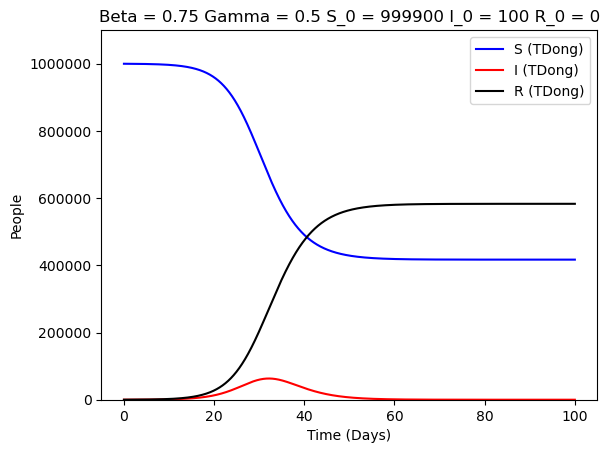

S_eq = 416924
I_eq = 0
R_eq = 583074
Perturbation (Epsilon): 1


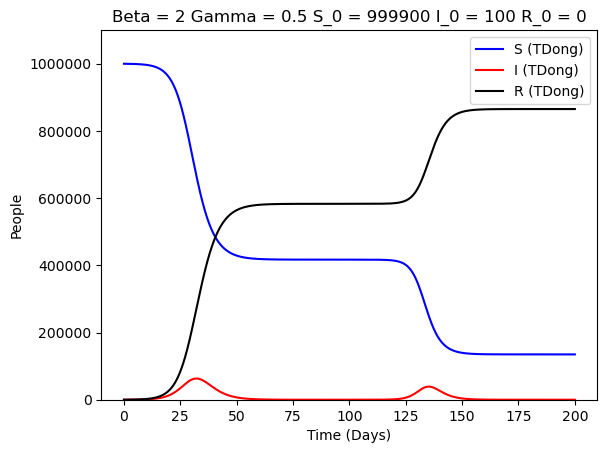

In this simulation, I simulated a disease-free equilibrium of an infection on a population N=10^6 after 100 days. From this simulation I reached S_eq = 416924, I_eq = 0, R_eq = 583074 at t = 100 days
Then at t = 100 days, I introduced a perturbation (Epsilon) = 1 new infected person. With this new infection, I purposefully set s > 1/R_0 with a larger beta/gamma ratio. This sort of mimicks the return of a more infectious mutant of the same pathogen after some disease-free equilibrium is reached.
We observe that in this case, because we have enough kindle to light the fire again to disturb the disease-free equilibrium, the number of infected grows again.
This is achieved because we satisfied the conditon beta*s-gamma > 0 or s > 1/R_0, and we get a new epidemic wave even after the previous curbing of the original epidemic

Caption: Herd immunity is only good up to a certain extent until a more infectious variant of the pathogen comes along to disturb the disease-free equilibrium state.


In [87]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000000
S_0 = 999900
I_0 = 100
R_0 = 0
beta = 0.75
gamma = 0.5
t0 = 0
t = 100 #days
dt = 0.01

def dSdt(t, S, I, R):
    return -1*beta*S*I/N

def dIdt(t, S, I, R):
    return beta*S*I/N-gamma*I

def dRdt(t, S, I, R):
    return gamma*I

def FEM(t0, t, dt, S_0, I_0, R_0):
    steps = int((t-t0)/dt)+1
    t_val = np.linspace(t0, t, steps)
    S_val = np.zeros(steps)
    I_val = np.zeros(steps)
    R_val = np.zeros(steps)
    S_val[0] = S_0
    I_val[0] = I_0
    R_val[0] = R_0

    for i in range(1, steps):
        t = t_val[i-1]
        S = S_val[i-1]
        I = I_val[i-1]
        R = R_val[i-1]
        S_val[i] = S + dSdt(t, S, I, R)*dt
        I_val[i] = I + dIdt(t, S, I, R)*dt
        R_val[i] = R + dRdt(t, S, I, R)*dt

    return t_val, S_val, I_val, R_val


t_sim, S_sim, I_sim, R_sim = FEM(t0, t, dt, S_0, I_0, R_0)
plt.plot(t_sim, S_sim, label='S (TDong)', color = 'blue')
plt.plot(t_sim, I_sim, label='I (TDong)', color = 'red')
plt.plot(t_sim, R_sim, label='R (TDong)', color = 'black')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = ' + str(beta) + ' Gamma = ' + str(gamma) + ' S_0 = ' + str(S_0) + ' I_0 = ' + str(I_0) + ' R_0 = ' + str(R_0))
plt.ylim([0,1.1*N])
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

S_eq = S_sim[-1]
I_eq = I_sim[-1]
R_eq = R_sim[-1]

print('S_eq = ' + str(int(S_eq)))
print('I_eq = ' + str(int(I_eq)))
print('R_eq = ' + str(int(R_eq)))

epsilon = 1

print('Perturbation (Epsilon): ' + str(epsilon))

beta = 2
gamma = 0.5
t0_eq = t
t_eq = 200
t_sim_perturb, S_sim_perturb, I_sim_perturb, R_sim_perturb = FEM(t0_eq, t_eq, dt, S_eq, I_eq+epsilon, R_eq)
plt.plot(np.concatenate((t_sim,t_sim_perturb)), np.concatenate((S_sim,S_sim_perturb)), label='S (TDong)', color = 'blue')
plt.plot(np.concatenate((t_sim,t_sim_perturb)), np.concatenate((I_sim,I_sim_perturb)), label='I (TDong)', color = 'red')
plt.plot(np.concatenate((t_sim,t_sim_perturb)), np.concatenate((R_sim,R_sim_perturb)), label='R (TDong)', color = 'black')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = ' + str(beta) + ' Gamma = ' + str(gamma) + ' S_0 = ' + str(S_0) + ' I_0 = ' + str(I_0) + ' R_0 = ' + str(R_0))
plt.ylim([0,1.1*N])
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

print('In this simulation, I simulated a disease-free equilibrium of an infection on a population N=10^6 after 100 days. From this simulation I reached S_eq = 416924, I_eq = 0, R_eq = 583074 at t = 100 days')
print('Then at t = 100 days, I introduced a perturbation (Epsilon) = 1 new infected person. With this new infection, I purposefully set s > 1/R_0 with a larger beta/gamma ratio. This sort of mimicks the return of a more infectious mutant of the same pathogen after some disease-free equilibrium is reached.')
print('We observe that in this case, because we have enough kindle to light the fire again to disturb the disease-free equilibrium, the number of infected grows again.')
print('This is achieved because we satisfied the conditon beta*s-gamma > 0 or s > 1/R_0, and we get a new epidemic wave even after the previous curbing of the original epidemic')
print('\nCaption: Herd immunity is only good up to a certain extent until a more infectious variant of the pathogen comes along to disturb the disease-free equilibrium state.')